We have the min and max temperatures in a city In India for each months of the year.  We would like to find a function to describe this and show it graphically, the dataset  given below. 
Task: 
1.fitting it to the periodic function 
2.plot the fit 
Data 
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
arr={'Min':[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18],'Max':[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]}

In [5]:
df=pd.DataFrame(arr)

In [26]:
df.head()

,Min,Max
0,21,39
1,23,41
2,27,43
3,28,47
4,32,49


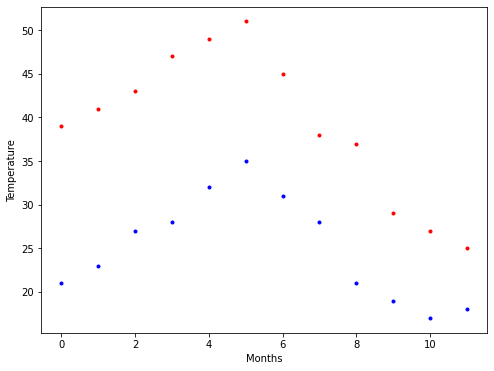

In [20]:
fig=plt.figure(figsize=(8,6))
months = np.arange(12)
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.scatter(months,df.Max,marker='.',c='r')
plt.scatter(months,df.Min,marker='.',c='b')

In [22]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      df['Max'], [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      df['Min'], [-40, 20, 0])

Text(0, 0.5, 'Temperature')

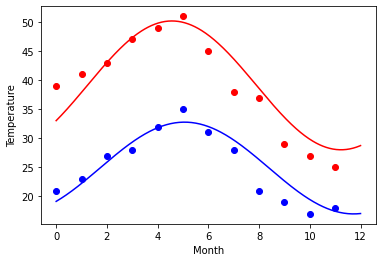

In [27]:

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, df['Max'], 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, df['Min'], 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

This assignment is for visualization using matplotlib: 
data to use: 
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv titanic = pd.read_csv(url) 
Charts to plot: 
1. Create a pie chart presenting the male/female proportion 
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender


In [29]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url) 

In [30]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


([<matplotlib.patches.Wedge at 0x7f3ff0ef1780>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'Male'),
  Text(0.48083667958064136, -0.9893412391939718, 'Female')])

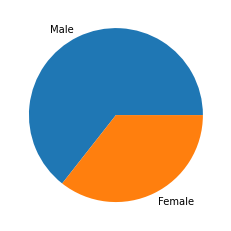

In [57]:
plt.pie(titanic.sex.value_counts(),labels=['Male','Female'],)

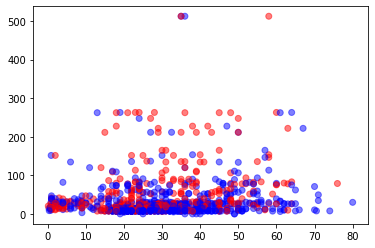

In [82]:
titanic = titanic.dropna(subset=['sex'])

mapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(mapping))